<a href="https://colab.research.google.com/github/nhn09/NLP-notebooks/blob/main/Thesis_3_29_23_pt_3_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature extraction and Pre process

In [ ]:
import nltk
import spacy
import gensim
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# !python -m spacy download en_core_web_sm


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from gensim.utils import simple_preprocess
from gensim.models import LdaModel
from gensim.corpora import Dictionary


df = pd.read_csv('/content/translated_dataset.csv')
df = df.drop(['post'], axis=1)

In [ ]:

def preprocess_text(text):
    return [token for token in simple_preprocess(text) if token not in stop_words]

stop_words = gensim.parsing.preprocessing.STOPWORDS


texts = [preprocess_text(text) for text in df['english_text']]

dictionary = Dictionary(texts)

corpus = [dictionary.doc2bow(text) for text in texts]

# Train the LDA model on the corpus
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, passes=10)

# Get the topic distribution for each document in the corpus
topic_distributions = lda_model.get_document_topics(corpus)

# Store the topic distributions in a new column in the dataframe
df['topic_distributions'] = topic_distributions



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(df['english_text'])

lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(bow_matrix)

topic_proportions = lda.transform(bow_matrix)

feature_matrix = pd.DataFrame(topic_proportions, columns=['topic_{}'.format(i) for i in range(10)])

data_with_features = pd.concat([df, feature_matrix], axis=1)



In [ ]:
data_with_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8692 entries, 0 to 8691
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Mach                 8692 non-null   float64
 1   LSRP12               8692 non-null   float64
 2   LSRP2                8692 non-null   float64
 3   NRSM                 8692 non-null   float64
 4   english_text         8692 non-null   object 
 5   topic_distributions  8692 non-null   object 
 6   topic_0              8692 non-null   float64
 7   topic_1              8692 non-null   float64
 8   topic_2              8692 non-null   float64
 9   topic_3              8692 non-null   float64
 10  topic_4              8692 non-null   float64
 11  topic_5              8692 non-null   float64
 12  topic_6              8692 non-null   float64
 13  topic_7              8692 non-null   float64
 14  topic_8              8692 non-null   float64
 15  topic_9              8692 non-null   f

Text analysis with TextBlob

In [ ]:
import pandas as pd
!pip install textblob
!pip install textstat
from textblob import TextBlob
from textstat import flesch_reading_ease, flesch_kincaid_grade

# Load the data into a Pandas DataFrame
data = data_with_features
# Define a function to analyze the text and return the relevant metrics
def analyze_text(text):
    blob = TextBlob(text)
    return {
  'polarity': blob.sentiment.polarity,
        'subjectivity': blob.sentiment.subjectivity,
        'flesch_reading_ease': flesch_reading_ease(text),
        'flesch_kincaid_grade': flesch_kincaid_grade(text),
        'lexical_density': len(set(blob.words)) / (len(blob.words)+1),
    }

# Apply the function to each row of the DataFrame and store the results in separate columns
data[['polarity', 'subjectivity', 'flesch_reading_ease', 'flesch_kincaid_grade', 'lexical_density']] = data['english_text'].apply(lambda x: pd.Series(analyze_text(x)))


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 KB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 46.8 MB/s eta 0:00:00


In [ ]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from string import punctuation

# Load the dataset
df_2 = data

# Define the functions for language style analysis
def get_word_tokens(text):
    return word_tokenize(text)

def get_word_count(tokens):
    return len(tokens)

def get_avg_word_length(tokens):
    return sum(len(token) for token in tokens) / len(tokens)

def get_word_freq_dist(tokens):
    return FreqDist(tokens)

def get_stopword_count(tokens):
    stop_words = set(stopwords.words('english') + list(punctuation))
    return len([token for token in tokens if token.lower() in stop_words])

def get_part_of_speech(tokens):
    return nltk.pos_tag(tokens)

# Apply the functions to the text column and create new columns for the results
df_2['word_tokens'] = df_2['english_text'].apply(get_word_tokens)
df_2['word_count'] = df_2['word_tokens'].apply(get_word_count)
df_2['avg_word_length'] = df_2['word_tokens'].apply(get_avg_word_length)
df_2['word_freq_dist'] = df_2['word_tokens'].apply(get_word_freq_dist)
df_2['stopword_count'] = df_2['word_tokens'].apply(get_stopword_count)
df_2['part_of_speech'] = df_2['word_tokens'].apply(get_part_of_speech)

# Preview the results
print(df_2.head())







[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


   Mach  LSRP12  LSRP2  NRSM  \
0  68.0     1.3    2.5   3.0   
1  68.0     1.3    2.5   3.0   
2  68.0     1.3    2.5   3.0   
3  68.0     1.3    2.5   3.0   
4  68.0     1.3    2.5   3.0   

                                        english_text  \
0                              my heart my soul..T-T   
1              Free speech is a joke in this country   
2  Make 500 sequels I don't care.Make another Jus...   
3  Everybody wants a piece of the politically cor...   
4                    And that's how a movement dies.   

                                 topic_distributions   topic_0   topic_1  \
0  [(0, 0.033340164), (1, 0.36668393), (2, 0.0333...  0.020001  0.020000   
1  [(0, 0.2994644), (1, 0.020006958), (2, 0.02000...  0.012502  0.012500   
2  [(0, 0.012529142), (1, 0.012528878), (2, 0.012...  0.005556  0.005556   
3  [(0, 0.29995903), (1, 0.5856051), (2, 0.014301...  0.899986  0.011111   
4  [(0, 0.03336451), (1, 0.3661786), (2, 0.033364...  0.016667  0.016667   

    topic_2  

In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8692 entries, 0 to 8691
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Mach                  8692 non-null   float64
 1   LSRP12                8692 non-null   float64
 2   LSRP2                 8692 non-null   float64
 3   NRSM                  8692 non-null   float64
 4   english_text          8692 non-null   object 
 5   topic_distributions   8692 non-null   object 
 6   topic_0               8692 non-null   float64
 7   topic_1               8692 non-null   float64
 8   topic_2               8692 non-null   float64
 9   topic_3               8692 non-null   float64
 10  topic_4               8692 non-null   float64
 11  topic_5               8692 non-null   float64
 12  topic_6               8692 non-null   float64
 13  topic_7               8692 non-null   float64
 14  topic_8               8692 non-null   float64
 15  topic_9              

In [ ]:
def count_pos(pos_list):
    pos_counts = {}
    for pos in pos_list:
        if pos[1] in pos_counts:
            pos_counts[pos[1]] += 1
        else:
            pos_counts[pos[1]] = 1
    return pos_counts

# Apply the function to the 'pos' column to get the POS counts for each row
df_2['pos_counts'] = df_2['part_of_speech'].apply(count_pos)

# Convert the 'pos_counts' column to separate columns for each POS and its count
df_2 = pd.concat([df_2.drop('pos_counts', axis=1), df_2['pos_counts'].apply(pd.Series)], axis=1)


In [ ]:
df_2.fillna(0, inplace=True)

In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8692 entries, 0 to 8691
Data columns (total 71 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Mach                  8692 non-null   float64
 1   LSRP12                8692 non-null   float64
 2   LSRP2                 8692 non-null   float64
 3   NRSM                  8692 non-null   float64
 4   english_text          8692 non-null   object 
 5   topic_distributions   8692 non-null   object 
 6   topic_0               8692 non-null   float64
 7   topic_1               8692 non-null   float64
 8   topic_2               8692 non-null   float64
 9   topic_3               8692 non-null   float64
 10  topic_4               8692 non-null   float64
 11  topic_5               8692 non-null   float64
 12  topic_6               8692 non-null   float64
 13  topic_7               8692 non-null   float64
 14  topic_8               8692 non-null   float64
 15  topic_9              

In [ ]:
df_2.to_csv("feature_dataset_8692.csv")



---


# Running Models


In [ ]:
import nltk
import spacy
import gensim
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")



# For Mach

this section showing result for without code switching, emoji and object columns in sevaral configurations:

*   all columns
*   all columns: scaled
*   dropping colsum>=6000
*   same, scaled
*   dropping colsum>=4000
*   same, scaled

all of these done for NB,RF and SVM.






# with all columns


In [ ]:
df = pd.read_csv('/content/feature_dataset_8692.csv')
y =(df.Mach<df.Mach.quantile()).replace({True:1, False:2})

x = df.drop(['Mach', 'LSRP12','LSRP2','NRSM','english_text','topic_distributions','word_tokens','part_of_speech','word_freq_dist'], axis=1)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

scaler = MinMaxScaler()

x_scaled = scaler.fit_transform(x.to_numpy())
x_scaled = pd.DataFrame(x_scaled)

print("Scaled Dataset Using MinMaxScaler")
x_scaled.head()

Scaled Dataset Using MinMaxScaler


,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
0,0.000000,0.020010,0.019990,0.020011,0.839355,0.020018,0.020283,0.020402,0.020158,0.019916,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000115,0.012497,0.012483,0.012498,0.012768,0.012503,0.012666,0.012740,0.012588,0.012413,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000230,0.005539,0.005533,0.005541,0.005659,0.005542,0.241820,0.005647,0.005579,0.005467,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000345,0.901597,0.011093,0.011106,0.011347,0.011113,0.011257,0.011324,0.011186,0.011025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000460,0.016670,0.016653,0.016675,0.147768,0.016679,0.016899,0.016996,0.016793,0.016581,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
nb_pred = nb_clf.predict(X_test)
nb_acc = accuracy_score(y_test, nb_pred)
print("Naive Bayes accuracy :", nb_acc)


X_train, X_test, y_train, y_test = train_test_split(x_scaled,y, test_size=0.3, random_state=42)

nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
nb_pred = nb_clf.predict(X_test)
nb_acc = accuracy_score(y_test, nb_pred)
print("Naive Bayes accuracy scaled:", nb_acc)

Naive Bayes accuracy : 0.4988496932515337
Naive Bayes accuracy scaled: 0.5011503067484663


In [ ]:
svm_clf = SVC(kernel='linear', C=1, cache_size=2000)
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
print("SVM accuracy:", svm_acc)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the random forest classifier to the training data
rfc.fit(X_train, y_train)

# make predictions on the testing data
y_pred = rfc.predict(X_test)

# calculate the accuracy of the random forest classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7246932515337423


In [ ]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(x_scaled,y, test_size=0.3, random_state=42)
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the random forest classifier to the training data
rfc.fit(X_train, y_train)

# make predictions on the testing data
y_pred = rfc.predict(X_test)

# calculate the accuracy of the random forest classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:(scaled)", accuracy)

Accuracy:(scaled) 0.7434815950920245


# dropping columns = sum zero > 6000


In [ ]:
df = pd.read_csv('/content/feature_dataset_8692.csv')
y =(df.Mach<df.Mach.quantile()).replace({True:1, False:2})



for column_name in df.columns:
    column = df[column_name]
    # Get the count of Zeros in column
    count = (column == 0).sum()

    if (count>=6000):
       print('Count of zeros in column ', column_name, ' is : ', count)
       df.drop(columns =column_name, inplace = True )

df = df.drop(['Mach', 'LSRP12','LSRP2','NRSM','english_text','topic_distributions','word_tokens','part_of_speech','word_freq_dist'], axis=1)

df.info()

Count of zeros in column  PRP$  is :  7318
Count of zeros in column  CD  is :  6608
Count of zeros in column  VBZ  is :  6161
Count of zeros in column  NNS  is :  6030
Count of zeros in column  VBP  is :  6249
Count of zeros in column  CC  is :  6924
Count of zeros in column  TO  is :  6939
Count of zeros in column  #  is :  7240
Count of zeros in column  WRB  is :  7995
Count of zeros in column  WP  is :  8006
Count of zeros in column  VBG  is :  7069
Count of zeros in column  VBD  is :  6790
Count of zeros in column  PDT  is :  8536
Count of zeros in column  VBN  is :  7439
Count of zeros in column  JJR  is :  8367
Count of zeros in column  ``  is :  8285
Count of zeros in column  ''  is :  8158
Count of zeros in column  (  is :  8170
Count of zeros in column  )  is :  7693
Count of zeros in column  ,  is :  6980
Count of zeros in column  JJS  is :  8266
Count of zeros in column  $  is :  8516
Count of zeros in column  POS  is :  7972
Count of zeros in column  MD  is :  7393
Count of

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

scaler = MinMaxScaler()

x_scaled = scaler.fit_transform(df.to_numpy())
x_scaled = pd.DataFrame(x_scaled)

print("Scaled Dataset Using MinMaxScaler")
x_scaled.head()

Scaled Dataset Using MinMaxScaler


,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.000000,0.020010,0.019990,0.020011,0.839355,0.020018,0.020283,0.020402,0.020158,0.019916,...,0.031915,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000115,0.012497,0.012483,0.012498,0.012768,0.012503,0.012666,0.012740,0.012588,0.012413,...,0.031915,0.015625,0.030303,0.002404,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000230,0.005539,0.005533,0.005541,0.005659,0.005542,0.241820,0.005647,0.005579,0.005467,...,0.021277,0.015625,0.015152,0.000000,0.000617,0.027778,0.044444,0.021739,0.006897,0.000000
3,0.000345,0.901597,0.011093,0.011106,0.011347,0.011113,0.011257,0.011324,0.011186,0.011025,...,0.031915,0.015625,0.030303,0.002404,0.000000,0.000000,0.022222,0.000000,0.000000,0.000000
4,0.000460,0.016670,0.016653,0.016675,0.147768,0.016679,0.016899,0.016996,0.016793,0.016581,...,0.010638,0.000000,0.030303,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004149


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df,y, test_size=0.2, random_state=42)

nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
nb_pred = nb_clf.predict(X_test)
nb_acc = accuracy_score(y_test, nb_pred)
print("Naive Bayes accuracy:", nb_acc)


X_train, X_test, y_train, y_test = train_test_split(x_scaled,y, test_size=0.2, random_state=42)

nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
nb_pred = nb_clf.predict(X_test)
nb_acc = accuracy_score(y_test, nb_pred)
print("Naive Bayes accuracy:", nb_acc)

Naive Bayes accuracy: 0.4974123059229442
Naive Bayes accuracy: 0.4974123059229442


In [ ]:
svm_clf = SVC(kernel='linear', C=1)
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
print("SVM accuracy:", svm_acc)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(x_scaled,y, test_size=0.3, random_state=42)
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the random forest classifier to the training data
rfc.fit(X_train, y_train)

# make predictions on the testing data
y_pred = rfc.predict(X_test)

# calculate the accuracy of the random forest classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:(scaled)", accuracy)

Accuracy:(scaled) 0.7630368098159509


# drop 4000>

In [ ]:
df = pd.read_csv('/content/feature_dataset_8692.csv')
y =(df.Mach<df.Mach.quantile()).replace({True:1, False:2})



for column_name in df.columns:
    column = df[column_name]
    # Get the count of Zeros in column
    count = (column == 0).sum()

    if (count>=4000):
       print('Count of zeros in column ', column_name, ' is : ', count)
       df.drop(columns =column_name, inplace = True )

df = df.drop(['Mach', 'LSRP12','LSRP2','NRSM','english_text','topic_distributions','word_tokens','part_of_speech','word_freq_dist'], axis=1)

from sklearn.preprocessing import MinMaxScaler
import pandas as pd

scaler = MinMaxScaler()

x_scaled = scaler.fit_transform(df.to_numpy())
x_scaled = pd.DataFrame(x_scaled)

print("Scaled Dataset Using MinMaxScaler")
x_scaled.head()


Count of zeros in column  PRP$  is :  7318
Count of zeros in column  CD  is :  6608
Count of zeros in column  JJ  is :  4455
Count of zeros in column  VBZ  is :  6161
Count of zeros in column  DT  is :  4776
Count of zeros in column  IN  is :  4677
Count of zeros in column  NNS  is :  6030
Count of zeros in column  PRP  is :  5720
Count of zeros in column  VBP  is :  6249
Count of zeros in column  RB  is :  5409
Count of zeros in column  VB  is :  5788
Count of zeros in column  CC  is :  6924
Count of zeros in column  TO  is :  6939
Count of zeros in column  :  is :  5862
Count of zeros in column  #  is :  7240
Count of zeros in column  WRB  is :  7995
Count of zeros in column  .  is :  4976
Count of zeros in column  WP  is :  8006
Count of zeros in column  VBG  is :  7069
Count of zeros in column  VBD  is :  6790
Count of zeros in column  PDT  is :  8536
Count of zeros in column  VBN  is :  7439
Count of zeros in column  JJR  is :  8367
Count of zeros in column  ``  is :  8285
Count o

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.000000,0.020010,0.019990,0.020011,0.839355,0.020018,0.020283,0.020402,0.020158,0.019916,...,0.50,0.0,0.941818,0.040000,0.684211,0.000960,0.058824,0.001817,0.031915,0.000000
1,0.000115,0.012497,0.012483,0.012498,0.012768,0.012503,0.012666,0.012740,0.012588,0.012413,...,0.70,0.8,0.933602,0.048358,0.912281,0.001344,0.080882,0.003633,0.031915,0.000000
2,0.000230,0.005539,0.005533,0.005541,0.005659,0.005542,0.241820,0.005647,0.005579,0.005467,...,0.40,0.4,0.905508,0.066567,0.972299,0.003841,0.102241,0.007266,0.021277,0.000617
3,0.000345,0.901597,0.011093,0.011106,0.011347,0.011113,0.011257,0.011324,0.011186,0.011025,...,0.55,0.1,0.894070,0.074328,0.923684,0.001536,0.124183,0.002725,0.031915,0.000000
4,0.000460,0.016670,0.016653,0.016675,0.147768,0.016679,0.016899,0.016996,0.016793,0.016581,...,0.50,0.0,0.929382,0.049552,0.898026,0.001344,0.066176,0.004541,0.010638,0.000000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df,y, test_size=0.2, random_state=42)

nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
nb_pred = nb_clf.predict(X_test)
nb_acc = accuracy_score(y_test, nb_pred)
print("Naive Bayes accuracy:", nb_acc)


X_train, X_test, y_train, y_test = train_test_split(x_scaled,y, test_size=0.2, random_state=42)

nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
nb_pred = nb_clf.predict(X_test)
nb_acc = accuracy_score(y_test, nb_pred)
print("Naive Bayes accuracy:", nb_acc)

Naive Bayes accuracy: 0.49856239217941345
Naive Bayes accuracy: 0.496262219666475


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df,y, test_size=0.2, random_state=42)

svm_clf = SVC(kernel='linear', C=1)
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
print("SVM accuracy:", svm_acc)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled,y, test_size=0.2, random_state=42)

svm_clf = SVC(kernel='linear', C=1)
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
print("SVM accuracy:", svm_acc)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(df,y, test_size=0.3, random_state=42)
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the random forest classifier to the training data
rfc.fit(X_train, y_train)

# make predictions on the testing data
y_pred = rfc.predict(X_test)

# calculate the accuracy of the random forest classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:(scaled)", accuracy)

Accuracy:(scaled) 0.7557515337423313


In [ ]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(x_scaled,y, test_size=0.3, random_state=42)
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the random forest classifier to the training data
rfc.fit(X_train, y_train)

# make predictions on the testing data
y_pred = rfc.predict(X_test)

# calculate the accuracy of the random forest classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:(scaled)", accuracy)

Accuracy:(scaled) 0.7523006134969326


# Ensemble

In [ ]:
df = pd.read_csv('/content/feature_dataset_8692.csv')
y =(df.Mach<df.Mach.quantile()).replace({True:1, False:2})



for column_name in df.columns:
    column = df[column_name]
    # Get the count of Zeros in column
    count = (column == 0).sum()

    if (count>=6000):
       df.drop(columns =column_name, inplace = True )

df = df.drop(['Mach', 'LSRP12','LSRP2','NRSM','english_text','topic_distributions','word_tokens','part_of_speech','word_freq_dist'], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8692 entries, 0 to 8691
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8692 non-null   int64  
 1   topic_0               8692 non-null   float64
 2   topic_1               8692 non-null   float64
 3   topic_2               8692 non-null   float64
 4   topic_3               8692 non-null   float64
 5   topic_4               8692 non-null   float64
 6   topic_5               8692 non-null   float64
 7   topic_6               8692 non-null   float64
 8   topic_7               8692 non-null   float64
 9   topic_8               8692 non-null   float64
 10  topic_9               8692 non-null   float64
 11  polarity              8692 non-null   float64
 12  subjectivity          8692 non-null   float64
 13  flesch_reading_ease   8692 non-null   float64
 14  flesch_kincaid_grade  8692 non-null   float64
 15  lexical_density      

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

from sklearn.preprocessing import MinMaxScaler
import pandas as pd

scaler = MinMaxScaler()

x_scaled = scaler.fit_transform(df.to_numpy())
x_scaled = pd.DataFrame(x_scaled)

print("Scaled Dataset Using MinMaxScaler")
x_scaled.head()



X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=42)


nb = GaussianNB()
rf = RandomForestClassifier(n_estimators=100, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
xgboost = xgb.XGBClassifier(random_state=42)

ensemble = VotingClassifier(estimators=[('nb', nb), ('rf', rf), ('dt', dt), ('xgboost', xgboost)], voting='hard')


ensemble.fit(X_train, y_train)

y_pred = ensemble.predict(X_test)


from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Scaled Dataset Using MinMaxScaler
Accuracy: 0.9785276073619632
Classification Report:
               precision    recall  f1-score   support

           1       0.96      1.00      0.98      1302
           2       1.00      0.96      0.98      1306

    accuracy                           0.98      2608
   macro avg       0.98      0.98      0.98      2608
weighted avg       0.98      0.98      0.98      2608



Confusion Matrix:
 [[1296    6]
 [  50 1256]]


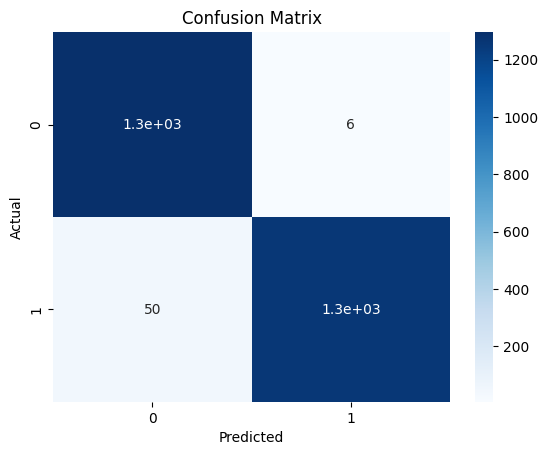

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


corr matrix and statistical analysis

In [ ]:
df_mach = pd.concat([x, y], axis = 1)


In [ ]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(19, 15))
plt.matshow(df_mach.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);